## UCSV Multivariate

Multivariate UCSV(Unobserved Component Stochastic Volatility) 모형에 대한 자세한 설명은 `manual/UCSV Multivariate.md` 참고.

### 데이터 불러오기: 분기별 미국 개인소비지출(PCE)
- DPCCRG_5: PCE excluding food and energy (chain-type price index)
- DFXARG_1: PCE Food (chain-type price index)
- DNRGRG_6: PCE Energy goods and services (chain-type price index)

In [1]:
import pandas as pd

In [2]:
# load data
dp_data = pd.read_csv("../data/ucsv_multivar_dp_data.csv", index_col=0, parse_dates=True)
dp_data

,DPCCRG_5,DFXARG_1,DNRGRG_6
QE,,,
1960-03-31,0.890472,0.983841,-4.310726
1960-06-30,1.664311,3.390526,3.473249
1960-09-30,1.613306,0.317101,5.825851
1960-12-31,1.211221,5.307922,0.068847
1961-03-31,0.615216,-0.760371,-1.759306
...,...,...,...
2014-06-30,1.882042,3.390564,5.008212
2014-09-30,1.212873,3.213802,-11.106417
2014-12-31,0.730385,2.131876,-44.515323


`bok_da` 시계열분석 패키지 `ts`의 `ucsv` 모듈에서 `MultivarUCSV` 클래스를 불러온 후 `model` 객체를 생성한다.

In [3]:
from bok_da.ts.ucsv import MultivarUCSV

# 테스트 설정입니다. 실제 사용시에는 충분한 수의 draws와 burnin을 설정해야 합니다.
model = MultivarUCSV(run_type="cython", verbose=True, n_draws=2000, n_burnin=500)
# model = bok_da.MultivarUCSV(run_type="cython", n_draws=2500, n_burnin=500, verbose=True)  # without_install 코드에서는 cython을 사용할 수 없습니다

> Loading Cython Module...
> Attempting to dynamically import: bok_da.ts.ucsv.ucsv_functions_cython_multivar...
> Cython Module Loaded.
> Initializing Model...
  - Run Type: cython
  - n_per_year: 4
  - n_draws: 2000
  - thinning: 10
  - n_burnin: 500
  - Verbose: True


`model`의 메서드 `fit()`을 이용해서 UCSV 모형을 추정할 수 있다.

In [6]:
model.fit(dp_data, columns=['DPCCRG', 'DFXARG', 'DNRGRG'])

> Start Fitting Model...
  - Input Data: 3 variables, 222 samples


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [01:21<00:00, 24.47it/s]

> Model Fitted.


`print_summary` 메서드를 통해 요약된 추정 결과를 확인할 수 있다.

In [7]:
model.print_summary()

-------------------------------------------------------------
     Variable       Mean    Var      2.5     97.5     ESS    
-------------------------------------------------------------
 g_eps (common)   -0.0003  0.0321  -0.3062  0.3142  112.7710 
 g_eps (DPCCRG)   -0.0156  0.0156  -0.3498  0.2671   88.5597 
 g_eps (DFXARG)   -0.0211  0.1028  -0.4668  0.4801  150.0000 
 g_eps (DNRGRG)   -0.0260  0.1578  -0.5648  0.5523   92.7988 
 g_dtau (common)   0.0219  0.3827  -0.8310  0.8679  150.0000 
 g_dtau (DPCCRG)  -0.0100  0.0179  -0.2281  0.2309   96.4685 
 g_dtau (DFXARG)  -0.0075  0.0122  -0.2236  0.1844   65.4506 
 g_dtau (DNRGRG)   0.0085  0.1153  -0.6634  0.6979  150.0000 
 ps (common)       0.9366  0.0007   0.8798  0.9800   15.2628 
 ps (DPCCRG)       0.9632  0.0004   0.9187  0.9941   85.6386 
 ps (DFXARG)       0.9799  0.0002   0.9528  0.9970   98.2571 
 ps (DNRGRG)       0.9267  0.0015   0.8388  0.9781   19.6011 
-------------------------------------------------------------


`print_traceplot` 메서드를 이용해 추정결과를 plot한다.

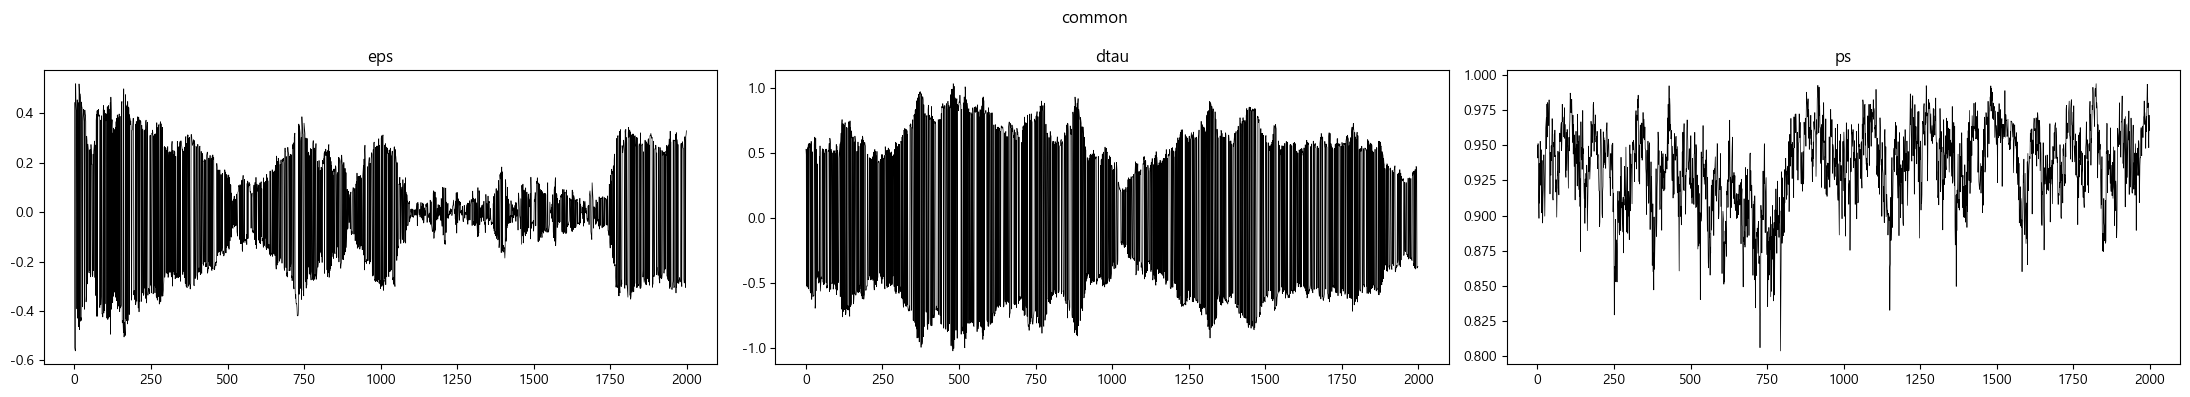

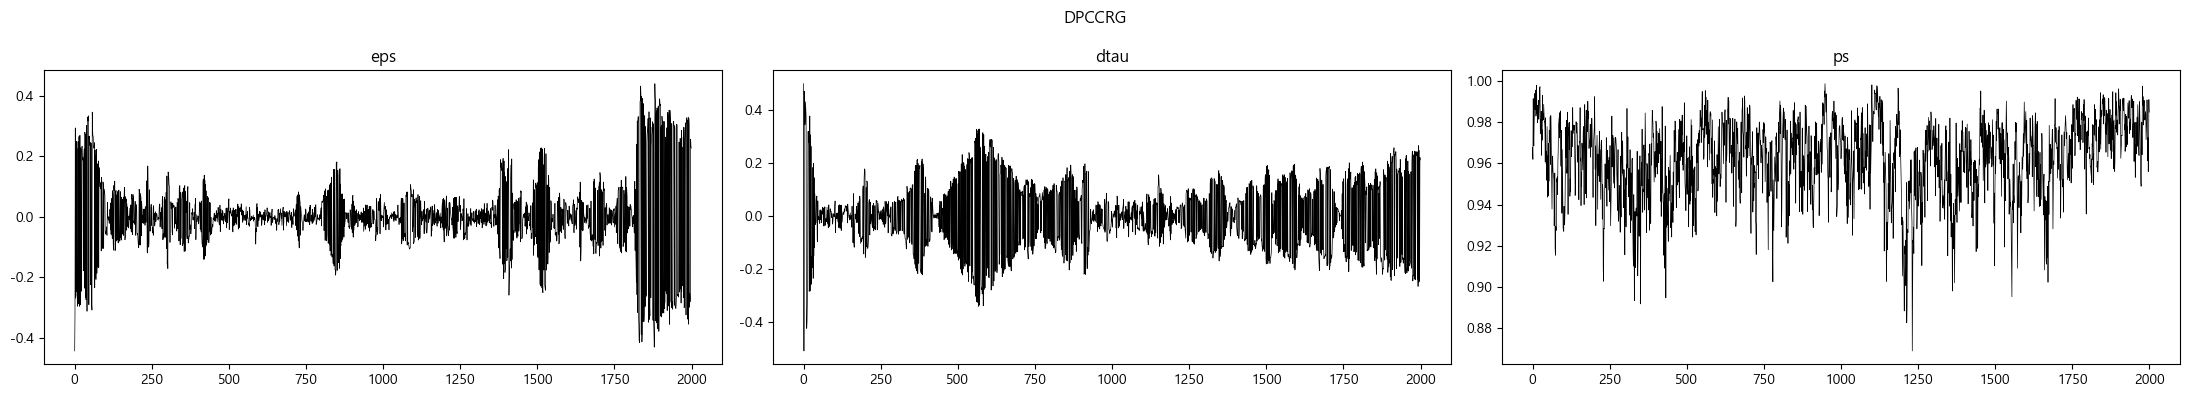

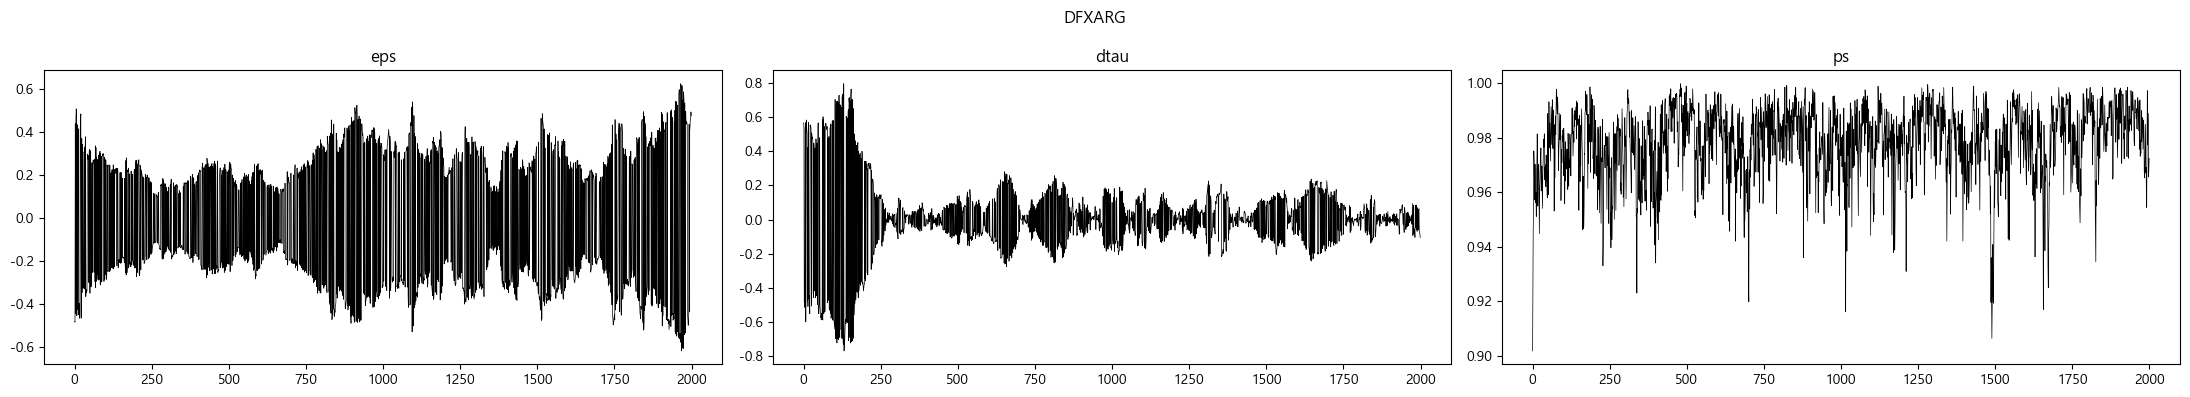

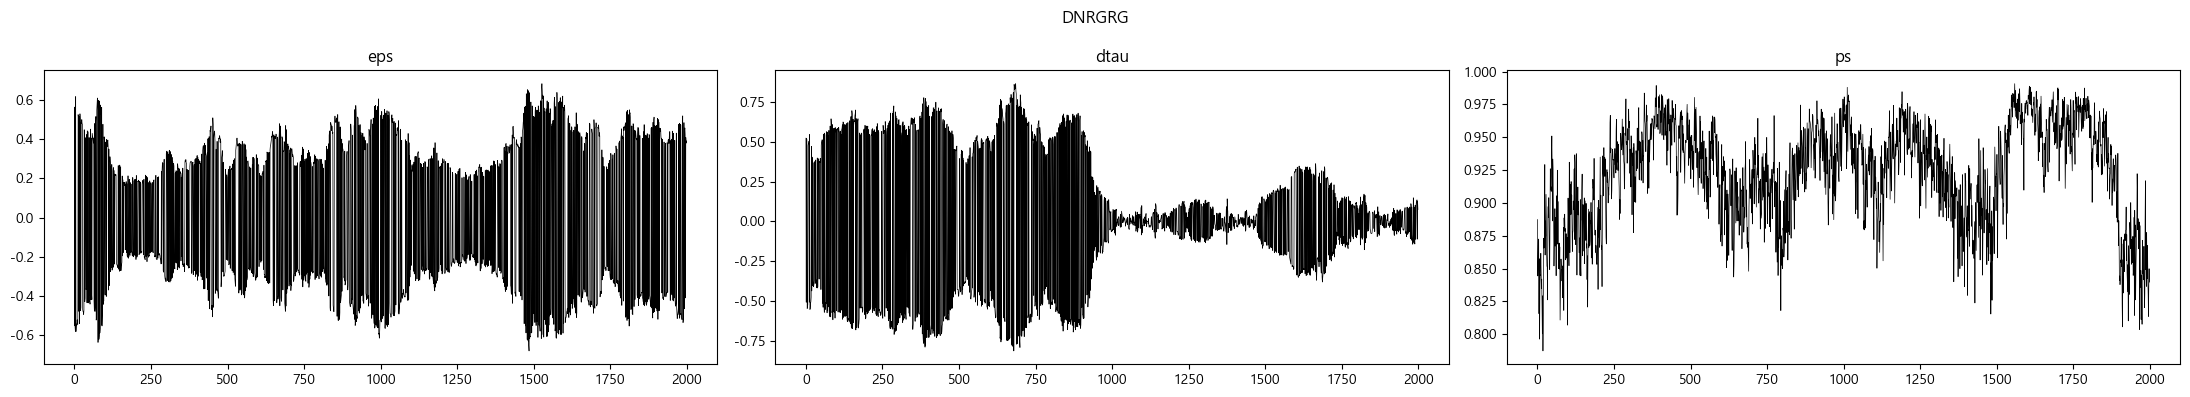

In [8]:
model.print_traceplot()